# Proyecto EDA

### Análisis Bivariante

3) Copia de la Base de Datos

In [14]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar la base de datos
file_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\data\Netflix_Movies_and_TV_Shows_cleaned.csv"
netflix_data = pd.read_csv(file_path)

# Crear una copia de la base de datos
data = netflix_data.copy()

# Mostrar las primeras filas para confirmar
print("Primeras 20 filas de la copia:")
print(data.head(20))

Primeras 20 filas de la copia:
       Title     Type        Genre  Release Year Rating  Duration  \
0    Title 1  TV Show       Comedy          1955     PG      1800   
1    Title 2  TV Show       Horror          2020      G      1800   
2    Title 3  TV Show       Action          1966  TV-PG       140   
3    Title 4    Movie     Thriller          2011  PG-13       141   
4    Title 5  TV Show      Romance          1959  TV-14       172   
5    Title 6    Movie       Action          2007  PG-13       141   
6    Title 7    Movie      Romance          1977  TV-14        68   
7    Title 8    Movie       Comedy          1971  TV-PG       104   
8    Title 9    Movie        Drama          2000  PG-13       141   
9   Title 10    Movie     Thriller          1975  TV-MA       141   
10  Title 11  TV Show      Romance          2021  TV-14       139   
11  Title 12  TV Show       Action          1986  PG-13        85   
12  Title 13    Movie  Documentary          1997      R       129   
13 

### Agrupados: Estadísticos por un campo categórico

3.1) Agrupar por Type (Movies vs TV Shows)

In [15]:
# Agrupar por 'Type' y calcular estadísticos de 'Duration'
grouped_type = data.groupby('Type')['Duration'].agg(['count', 'mean', 'sum'])
print("Estadísticos agrupados por 'Type':\n")
print(grouped_type)

Estadísticos agrupados por 'Type':

         count        mean     sum
Type                              
Movie     1473  130.191446  191772
TV Show   1527  637.291421  973144


El resultado muestra cuántos registros hay por cada Type (conteo), la duración promedio y la suma total de minutos.

3.2) Agrupar por Genre y calcular la duración promedio

In [16]:
# Agrupar por 'Genre' y calcular la media de 'Duration'
grouped_genre = data.groupby('Genre')['Duration'].mean().sort_values(ascending=False)
print("\nDuración promedio por 'Genre':\n")
print(grouped_genre)


Duración promedio por 'Genre':

Genre
Comedy         426.219512
Documentary    424.517615
Sci-Fi         422.695652
Action         392.267030
Romance        377.265957
Drama          363.888889
Horror         357.080402
Thriller       350.959799
Name: Duration, dtype: float64


Muestra la duración promedio de títulos agrupados por Genre ordenados de mayor a menor.

3.3) Agrupar por Country y calcular conteo

In [17]:
# Agrupar por 'Country' y contar la cantidad de registros
grouped_country = data['Country'].value_counts().head(10)  # Top 10 países
print("\nTop 10 países con más títulos:\n")
print(grouped_country)


Top 10 países con más títulos:

Country
Canada            421
United Kingdom    392
South Korea       376
Germany           373
Australia         371
United States     369
Japan             349
India             349
Name: count, dtype: int64


Muestra el top 10 de países con la mayor cantidad de títulos en la base.

3.4) Gráficos

3.4.1) Scatter Plot (relación entre Release Year y Duration)


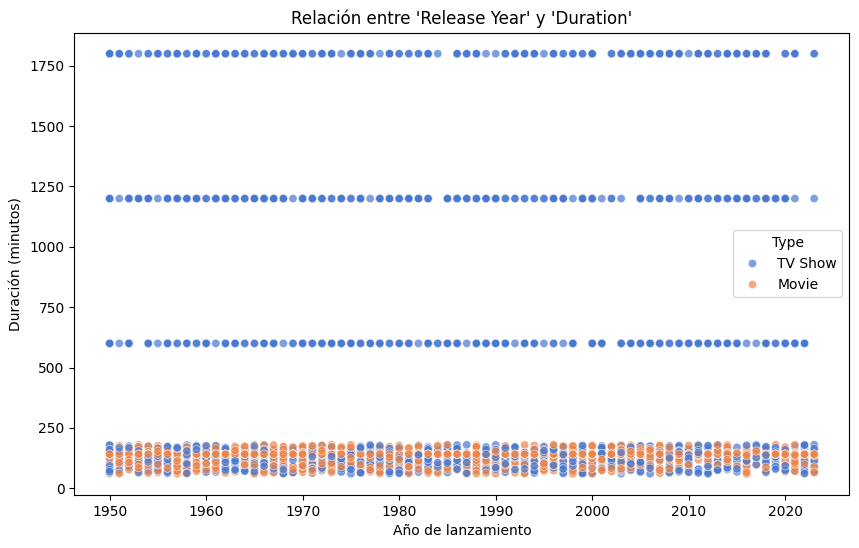

In [28]:
# Scatter plot entre 'Release Year' y 'Duration'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Release Year', y='Duration', data=data, hue='Type', palette="muted", alpha=0.7)
plt.title("Relación entre 'Release Year' y 'Duration'")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Duración (minutos)")
plt.legend(title="Type")

# Guardar la imagen
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Bivariante_Scatter_Year_Duration.png"
plt.savefig(output_path)
plt.show()


- Muestra la relación entre el año de lanzamiento (Release Year) y la duración (Duration).
- Se diferencian las películas y series usando hue='Type'.

3.4.2) Diagrama de Barras (Duración promedio por Type)

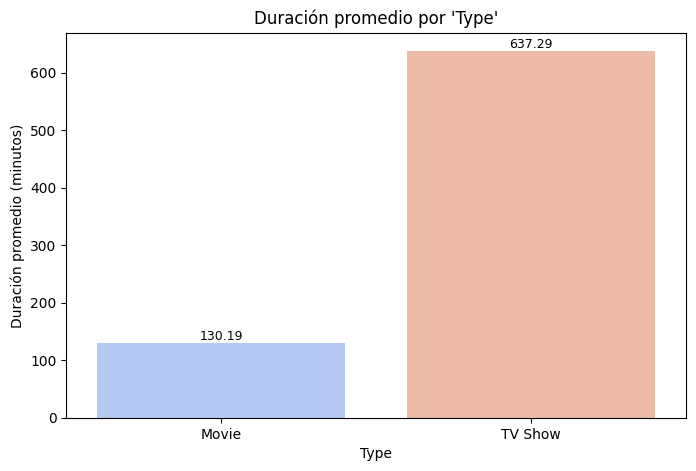

In [29]:
# Agrupar por 'Type' y calcular la duración promedio
grouped_type = data.groupby('Type')['Duration'].mean()

# Diagrama de barras: duración promedio por 'Type'
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=grouped_type.index, y=grouped_type.values, palette="coolwarm", hue=grouped_type.index, legend=False)
plt.title("Duración promedio por 'Type'")
plt.xlabel("Type")
plt.ylabel("Duración promedio (minutos)")

# Mostrar valores encima de las barras
for i, val in enumerate(grouped_type.values):
    plt.text(i, val, f"{val:.2f}", ha="center", va="bottom", fontsize=9, color="black")

# Guardar la imagen
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Bivariante_Barras_Duration_Type.png"
plt.savefig(output_path)
plt.show()


- El gráfico muestra la duración promedio de películas (Movie) y series (TV Show).

3.4.3) Cross Table (Conteo cruzado entre Type y Genre)

In [34]:
# Tabla cruzada entre 'Type' y 'Genre'
cross_table = pd.crosstab(data['Type'], data['Genre'])
print("\nTabla cruzada entre 'Type' y 'Genre':")
print(cross_table.head(10))

# Guardar la tabla cruzada como imagen
import dataframe_image as dfi # type: ignore
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Bivariante_CrossTable_Type_Genre.png"
dfi.export(cross_table, output_path)



Tabla cruzada entre 'Type' y 'Genre':
Genre    Action  Comedy  Documentary  Drama  Horror  Romance  Sci-Fi  Thriller
Type                                                                          
Movie       173     180          172    189     200      202     148       209
TV Show     194     189          197    189     198      174     197       189


- Una tabla cruzada que cuenta la cantidad de títulos para cada combinación de Type y Genre.

3.4.4) Binning (Duración agrupada en intervalos)

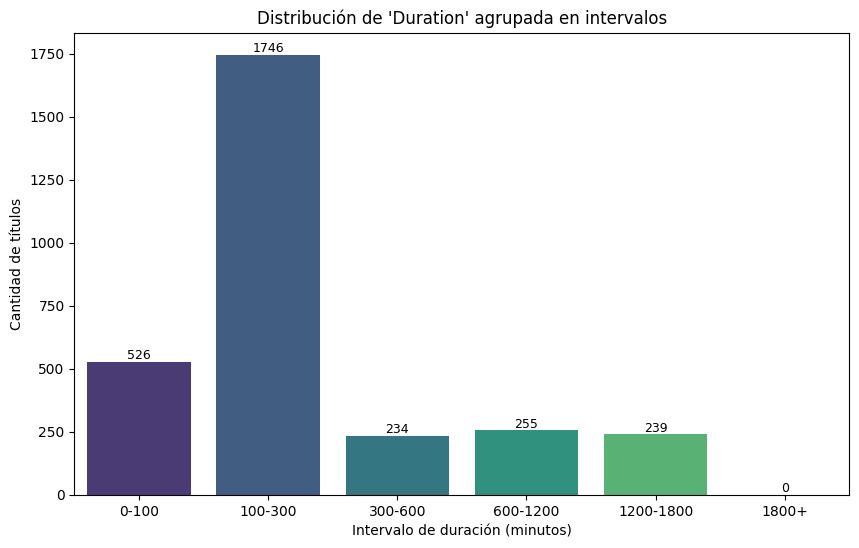

In [32]:
# Crear bins ajustados para la columna 'Duration'
bins = [0, 100, 300, 600, 1200, 1800, data['Duration'].max() + 1]  # Sumar 1 al máximo para evitar duplicados
labels = ['0-100', '100-300', '300-600', '600-1200', '1200-1800', '1800+']

# Aplicar pd.cut con bins 
data['Duration_Bins'] = pd.cut(data['Duration'], bins=bins, labels=labels, duplicates='drop')

# Contar títulos por intervalo
duration_bins_count = data['Duration_Bins'].value_counts().sort_index()

# Visualización 
plt.figure(figsize=(10, 6))
sns.barplot(x=duration_bins_count.index, y=duration_bins_count.values, hue=duration_bins_count.index, 
            palette="viridis", legend=False)
plt.title("Distribución de 'Duration' agrupada en intervalos")
plt.xlabel("Intervalo de duración (minutos)")
plt.ylabel("Cantidad de títulos")

# Mostrar valores encima de las barras
for i, val in enumerate(duration_bins_count.values):
    plt.text(i, val, f"{val}", ha="center", va="bottom", fontsize=9, color="black")

# Guardar la imagen
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Bivariante_Duration_Binning.png"
plt.savefig(output_path)
plt.show()

- Agrupa las duraciones en intervalos definidos y muestra cuántos títulos pertenecen a cada intervalo.


3.4.5) Guardar Imagenes en Modo Collage

In [35]:
from PIL import Image

# Rutas de las imágenes individuales
img_paths = [
    r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Bivariante_Scatter_Year_Duration.png",
    r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Bivariante_Barras_Duration_Type.png",
    r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Bivariante_CrossTable_Type_Genre.png",
    r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Bivariante_Duration_Binning.png"
]

# Cargar las imágenes
images = [Image.open(img) for img in img_paths]

# Determinar el tamaño del lienzo para la imagen combinada (2x2)
width, height = images[0].size  # Asumimos que todas las imágenes tienen el mismo tamaño
combined_width = width * 2
combined_height = height * 2

# Crear un nuevo lienzo en blanco
combined_image = Image.new("RGB", (combined_width, combined_height), color="white")

# Pegar cada imagen en su posición correspondiente
combined_image.paste(images[0], (0, 0))                  # Arriba izquierda
combined_image.paste(images[1], (width, 0))              # Arriba derecha
combined_image.paste(images[2], (0, height))             # Abajo izquierda
combined_image.paste(images[3], (width, height))         # Abajo derecha

# Guardar la imagen combinada
output_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Bivariante_Graficos_Combinados.png"
combined_image.save(output_path)

# Mostrar confirmación
print(f"Imagen combinada guardada en: {output_path}")
combined_image.show()  # Mostrar la imagen combinada (opcional)


Imagen combinada guardada en: C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Project_Break_I__EDA\img\Bivariante_Graficos_Combinados.png
